Chapter 14

# 数列求和
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码的主要目的是使用符号计算和数值计算来研究某些数列的部分和以及它们在 $n \to \infty$ 时的极限行为。代码分为三个部分：定义数列的部分和、计算极限值、绘制部分和的收敛趋势图。

1. **定义数列的部分和**：代码使用`SymPy`库的`Sum`函数定义了三种数列的部分和表示法。数列的形式分别为：
   - $$ S_n = \sum_{k=0}^{n} \frac{1}{2^k} $$
   - $$ S_n = \sum_{k=0}^{n} \frac{1}{(k+1)(k+2)} $$
   - $$ S_n = \sum_{k=0}^{n} \frac{1}{k!} $$

   其中，$n$表示累加的上限。每种数列的表达式对应着不同的收敛特性。例如，$\sum \frac{1}{2^k}$ 是一个以 $2$ 为底的几何级数，通常是收敛的。

2. **计算数列极限**：使用`limit_seq`函数计算数列在 $n \to \infty$ 时的极限值，即部分和是否存在一个收敛的终值。例如，对于 $\sum \frac{1}{k!}$，代码会计算其在无穷远处的收敛值，因为阶乘的快速增长导致此数列快速收敛。

3. **数值化并计算部分和**：代码通过`lambdify`将符号表达式转换为可数值化的Python函数`seq_sum_fcn`。随后，对 $n$ 从 $0$ 到 $100$ 的每个值计算部分和，并将结果存储在列表`seq_sum_array`中。这个部分和的计算过程用于观察数列在不同$n$值下的累积增长趋势。

4. **绘制部分和的收敛趋势图**：使用`Matplotlib`绘制部分和的离散点图。横轴为 $n$ 的对数刻度，以便更清晰地展示数列在大$n$下的增长或收敛情况。纵轴表示部分和的值，通过观察其上限（设为 $3$），可以直观地判断部分和的收敛特性。

最终，代码生成的图像展示了数列的部分和在不同 $n$ 下的变化规律，帮助分析这些数列的收敛性。

## 导入包

In [1]:
from sympy import limit_seq, Sum, lambdify, factorial  # 导入SymPy中求极限、求和、符号化函数和阶乘的函数
from sympy.abc import n, k  # 导入符号变量n和k
import numpy as np
from matplotlib import pyplot as plt  # 导入NumPy和Matplotlib用于数值计算和绘图

## 定义数列的部分和

In [2]:
seq_sum = Sum(1 / 2**k, (k, 0, n))  # 定义数列的部分和: 1/(2^k)从k=0到n的和
seq_sum = Sum(1 / ((k + 1)*(k + 2)), (k, 0, n))  # 定义数列的部分和: 1/((k+1)*(k+2))从k=0到n的和
seq_sum = Sum(1 / factorial(k), (k, 0, n))  # 定义数列的部分和: 1/k!从k=0到n的和

## 求数列的极限

In [3]:
seq_limit = limit_seq(seq_sum, n)  # 计算数列和的极限，当n趋近于无穷大时的值

## 转换为可数值计算的函数

In [4]:
seq_sum_fcn = lambdify(n, seq_sum)  # 将数列部分和表达式转换为可以数值计算的函数

## 计算数列部分和在n=5时的值

In [5]:
seq_sum.evalf(subs={n: 5})  # 求部分和在n=5时的数值

2.71666666666667

## 初始化数列项的范围

In [6]:
n_array = np.arange(0, 100 + 1, 1)  # 定义n的取值范围，从0到100，每次增加1

## 计算部分和的值

In [7]:
seq_sum_array = []  # 创建列表用于存储数列部分和

for n in n_array:
    seq_n = seq_sum_fcn(n)  # 计算部分和的第n项
    seq_sum_array.append(seq_n)  # 将部分和的第n项添加到列表中

## 绘制数列部分和的图像

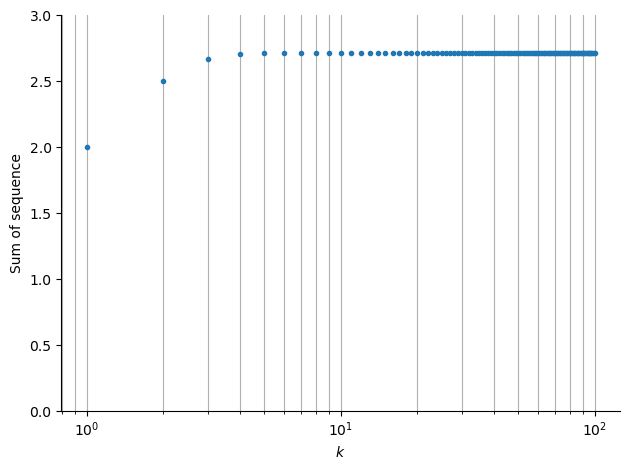

In [8]:
fig, ax = plt.subplots()  # 创建绘图窗口

ax.plot(n_array, seq_sum_array, linestyle='None', marker='.')  # 绘制部分和的离散点图

ax.set_xlabel('$k$')  # 设置x轴标签
ax.set_ylabel('Sum of sequence')  # 设置y轴标签
ax.set_xscale('log')  # 将x轴的刻度设置为对数刻度
ax.set_ylim(0, 3)  # 设置y轴的范围
ax.spines['right'].set_visible(False)  # 隐藏右边框
ax.spines['top'].set_visible(False)  # 隐藏上边框
plt.grid(True, which="both", axis='x')  # 在x轴方向上设置网格线，对数刻度下所有刻度都有网格
plt.tight_layout()  # 紧凑布局
plt.show()  # 显示绘图结果